# Data Processing with Pandas

In [1]:
# Import the libraries we need

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#The dataset used is a randrom dataset made for the purposes of this project. It shares information about the sales 
#of a soft drink product including some possible characteristics together with other information. 

#Load the dataset
df = pd.read_csv('product_data.csv')

print(f"The DataFrame:\n{df}")

# The row numbers are automatically generated and is called the index
# We can display the index too

print(f"\nIndex values:\n{df.index}")

The DataFrame:
       year        city brand     flavour  sales_quant  price  sales_value
0      2021   SHEFFIELD     F       BERRY         1398    3.2       4473.6
1      2020  BIRMINGHAM     C  STRAWBERRY         1764    3.1       5468.4
2      2022       LEEDS     C       BERRY         1352    3.0       4056.0
3      2022   LIVERPOOL     C       APPLE         1928    3.0       5784.0
4      2020      LONDON     D  STRAWBERRY         1424    3.2       4556.8
...     ...         ...   ...         ...          ...    ...          ...
23551  2020   SHEFFIELD     A       APPLE         1850    3.2       5920.0
23552  2020      LONDON     B       LEMON         1643    2.9       4764.7
23553  2021   LEICESTER     E       LEMON         1205    3.1       3735.5
23554  2021  MANCHESTER     C       APPLE         1283    2.9       3720.7
23555  2020   LIVERPOOL     D       BERRY         1789    2.9       5188.1

[23556 rows x 7 columns]

Index values:
RangeIndex(start=0, stop=23556, step=1)


In [3]:
# names of the columns in a 'List'
cols = list(df.columns)
print(f"\nColumns names captured in a list: {cols}")


Columns names captured in a list: ['year', 'city', 'brand', 'flavour', 'sales_quant', 'price', 'sales_value']


In [4]:
# values of a specific column in the dataset in a pandas series
name = 'city'
print(f"Extract Values of column {name}:\n{df.city}")

Extract Values of column city:
0         SHEFFIELD
1        BIRMINGHAM
2             LEEDS
3         LIVERPOOL
4            LONDON
            ...    
23551     SHEFFIELD
23552        LONDON
23553     LEICESTER
23554    MANCHESTER
23555     LIVERPOOL
Name: city, Length: 23556, dtype: object


In [5]:
#Basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23556 entries, 0 to 23555
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         23556 non-null  int64  
 1   city         23498 non-null  object 
 2   brand        23556 non-null  object 
 3   flavour      23556 non-null  object 
 4   sales_quant  23556 non-null  int64  
 5   price        23461 non-null  float64
 6   sales_value  23556 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.3+ MB


In [6]:
# Summarize the dataframe - its shape (rows,columns) and its statistics

print(f"Shape of the Dataframe:\n{df.shape}\n")

print(f"Statistics of the numeric columns:\n{df.describe()}\n")

Shape of the Dataframe:
(23556, 7)

Statistics of the numeric columns:
               year   sales_quant         price   sales_value
count  23556.000000  23556.000000  23461.000000  23556.000000
mean    2021.002292   1501.158643      3.050286   4567.774992
std        0.814480    289.152229      0.115693    925.927099
min     2020.000000   1000.000000      2.900000      0.000000
25%     2020.000000   1251.000000      2.900000   3801.900000
50%     2021.000000   1500.000000      3.000000   4575.600000
75%     2022.000000   1752.000000      3.200000   5334.000000
max     2022.000000   2000.000000      3.800000   7463.200000



# Missing values

#### How do we deal with missing values? ####

1. We can eliminate row and columns which have missing values.

2. We can fill those missing values with basic statistical techniques.

3. We can choose to do a mix of both.

The fundamental idea is: Can we keep as much information as possible before deleting it.

The general guideline suggested is:

- if any column has a large amount of missing values (say 50% or more), then there is no meaning in keeping such a column.
- if there are some rows of missing values, we try to fill those values using statistical methods.


In [7]:
# Check for missing values per column. An answer of True or False will appear next to each column.

df.isna().any()

year           False
city            True
brand          False
flavour        False
sales_quant    False
price           True
sales_value    False
dtype: bool

In [8]:
# we can check how many missing values we have per column

df.isna().sum()

year            0
city           58
brand           0
flavour         0
sales_quant     0
price          95
sales_value     0
dtype: int64

In [9]:
#It can be seen that in the specific dataset, we have 58 values missing from the column "city" and 95 values missing
#for the column of "price". In this case, because we cannot replace with any other statistic the city missing in the related
#rows, an option is to drop these rows. As regards the price column, we can use a statistic measure such as mean, median 
#or mode to fill in the missing values.

In [10]:
#Let's first copy the dataset to another dataframe

df1 = df.copy()

In [11]:
#Drop missing values from column 'city'

df1.dropna(subset = ['city'], inplace=True)

print(df1)

       year        city brand     flavour  sales_quant  price  sales_value
0      2021   SHEFFIELD     F       BERRY         1398    3.2       4473.6
1      2020  BIRMINGHAM     C  STRAWBERRY         1764    3.1       5468.4
2      2022       LEEDS     C       BERRY         1352    3.0       4056.0
3      2022   LIVERPOOL     C       APPLE         1928    3.0       5784.0
4      2020      LONDON     D  STRAWBERRY         1424    3.2       4556.8
...     ...         ...   ...         ...          ...    ...          ...
23551  2020   SHEFFIELD     A       APPLE         1850    3.2       5920.0
23552  2020      LONDON     B       LEMON         1643    2.9       4764.7
23553  2021   LEICESTER     E       LEMON         1205    3.1       3735.5
23554  2021  MANCHESTER     C       APPLE         1283    2.9       3720.7
23555  2020   LIVERPOOL     D       BERRY         1789    2.9       5188.1

[23498 rows x 7 columns]


In [12]:
#Check that there are no any missing values now from column city.

df1.isna().sum()

year            0
city            0
brand           0
flavour         0
sales_quant     0
price          95
sales_value     0
dtype: int64

In [13]:
#Fill in missing values of price with the mean.
#We can work on a copy of df1

df2 = df1.copy()

#use fillna() command

df2 = df2.fillna(df2.mean())

print(f"Dataset after dropping missing values: \n{df2}")

Dataset after dropping missing values: 
       year        city brand     flavour  sales_quant  price  sales_value
0      2021   SHEFFIELD     F       BERRY         1398    3.2       4473.6
1      2020  BIRMINGHAM     C  STRAWBERRY         1764    3.1       5468.4
2      2022       LEEDS     C       BERRY         1352    3.0       4056.0
3      2022   LIVERPOOL     C       APPLE         1928    3.0       5784.0
4      2020      LONDON     D  STRAWBERRY         1424    3.2       4556.8
...     ...         ...   ...         ...          ...    ...          ...
23551  2020   SHEFFIELD     A       APPLE         1850    3.2       5920.0
23552  2020      LONDON     B       LEMON         1643    2.9       4764.7
23553  2021   LEICESTER     E       LEMON         1205    3.1       3735.5
23554  2021  MANCHESTER     C       APPLE         1283    2.9       3720.7
23555  2020   LIVERPOOL     D       BERRY         1789    2.9       5188.1

[23498 rows x 7 columns]


In [14]:
#Check that there are no missing values in the whole dataset

df2.isna().sum()

year           0
city           0
brand          0
flavour        0
sales_quant    0
price          0
sales_value    0
dtype: int64

In [15]:
#list with all the values in the price column

list(df2['price'].unique())

[3.2, 3.1, 3.0, 2.9, 3.0502008289532436, 3.8, 3.7, 3.65, 3.4, 3.75]

In [16]:
# Let us take a look at the processed dataframe compared to the initial dataframe

print(f"Final Dataframe:\n{df2.describe()}\n\nVersus depleted DataFrame:\n{df.describe()}")

Final Dataframe:
               year  sales_quant         price   sales_value
count  23498.000000  23498.00000  23498.000000  23498.000000
mean    2021.001915   1501.10469      3.050201   4567.463227
std        0.814468    289.12437      0.115349    925.888809
min     2020.000000   1000.00000      2.900000      0.000000
25%     2020.000000   1251.00000      2.900000   3801.900000
50%     2021.000000   1500.00000      3.050201   4575.300000
75%     2022.000000   1752.00000      3.200000   5333.100000
max     2022.000000   2000.00000      3.800000   7463.200000

Versus depleted DataFrame:
               year   sales_quant         price   sales_value
count  23556.000000  23556.000000  23461.000000  23556.000000
mean    2021.002292   1501.158643      3.050286   4567.774992
std        0.814480    289.152229      0.115693    925.927099
min     2020.000000   1000.000000      2.900000      0.000000
25%     2020.000000   1251.000000      2.900000   3801.900000
50%     2021.000000   1500.000000 

In [17]:
#We can see some differences in the statistics between the two datasets but there are no big discrepancies as the missing
#values that have been replaces by the mean value weren't that much compared to the total number of rows.

# Outliers

In [18]:
#We can calculate the outlier data points using the statistical method called interquartile range (IQR).Using the IQR, 
#the outlier data points are the ones falling below Q1 – (1.5*IQR) or above Q3 + (1.5*IQR). The Q1 is the 25th percentile 
#and Q3 is the 75th percentile of the dataset, and IQR represents the interquartile range calculated by Q3 minus Q1 (Q3–Q1). 

In [19]:
#Let us write a function to compute IQR and return outliers. Whenever we want to compute outliers, we can call this function
#Pandas has a command called '.quantile(x)' which returns the corresponding quantile value

def find_outliers_IQR(df2):
    
     q1=df2.quantile(0.25)
     q3=df2.quantile(0.75)
     IQR=q3-q1
     outliers = df2[((df2<(q1-1.5*IQR)) | (df2>(q3+1.5*IQR)))] 
     #Pandas can be used for conditional testing (| is the same as OR)
    
     return outliers

In [20]:
#So we can find the outliers in a numeric column using the above function

data_outliers = find_outliers_IQR(df2['price'])

q1=df2.quantile(0.25)
q3=df2.quantile(0.75)
IQR=q3-q1
lower = q1-(1.5*IQR)
upper = q3+(1.5*IQR)

#number of outliers
print(f"Number of Outliers: {len(data_outliers)}")

#lower outlier bound
print(f"\nLower outlier bound: {lower.price.round(2)}")

#upper outlier bound
print(f"\nUpper outlier bound: {upper.price.round(2)}")

#Values of the outliers
print(f"\nOutliers in price:\n{data_outliers}")

#Max outlier & min outlier
print(f"\nMax value of Outlier: {data_outliers.max()} and Min value: {data_outliers.min()}")

Number of Outliers: 34

Lower outlier bound: 2.45

Upper outlier bound: 3.65

Outliers in price:
69       3.80
994      3.70
1037     3.70
1130     3.70
1433     3.80
2225     3.70
3490     3.70
4829     3.80
5702     3.70
7991     3.70
9252     3.80
9651     3.70
11428    3.70
13640    3.70
14492    3.70
14943    3.80
15086    3.70
16524    3.70
16627    3.70
16837    3.80
16860    3.80
18009    3.70
18172    3.80
18176    3.70
18997    3.80
19629    3.80
20350    3.70
21297    3.75
21684    3.75
21773    3.70
21930    3.75
22833    3.75
22839    3.75
22957    3.70
Name: price, dtype: float64

Max value of Outlier: 3.8 and Min value: 3.7


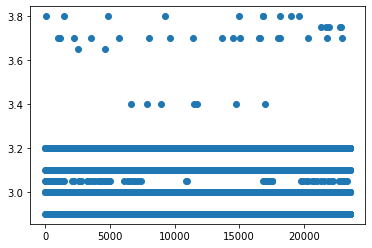

In [21]:
# We can also get a sense for the outliers in price column visually

plt.scatter(df2.index,df2.price)
plt.show()

In [22]:
#From the above chart we can see that the majority of the prices fall between 2.90 and 3.20. We found from before that the
#upper bound for outliers is 3.65 so whatever is above 3.65 is considered an outlier. From the chart we can see that we have
#some values above the upper bound (3.70, 3.75 & 3.80). We do not have any outliers below 2.45.

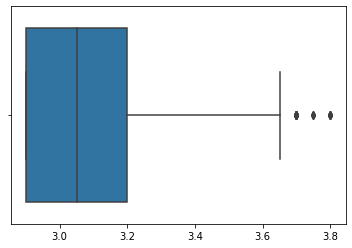

In [23]:
# Check for outliers with box plot

sns.boxplot(df2[['price']])
plt.show()

In [24]:
#As mentioned above, we have outliers only from the upper bound and they can be seen from the boxplot above at the right end. 